## 1. Import packages

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Import Churn_prediction file

In [122]:
data = pd.read_excel('/Users/doanthinh/Downloads/[K20] Final Project/churn_prediction.xlsx')
data = pd.DataFrame(data)
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## 3. Check the imbalanced of data 

In [124]:
# Calculate the total number of data points
total_data = data.shape[0]

# Calculate the number of data points with label 1
data_with_churn = data['Churn'].value_counts()[1]

# Calculate the percentage
percentage = (data_with_churn / total_data) * 100

# Display the result
print(f"Percentage of label 1: {percentage:.2f}%")

Percentage of label 1: 16.84%


#### the data is quite imbalanced -> continued process ML model

## 4. Handle Values 

### 4.1 Check duplicate 

In [125]:
# Check for duplicate rows
has_duplicates = data.duplicated().any()

if has_duplicates:
    print("The dataset contains duplicate rows.")
else:
    print("The dataset does not contain any duplicate rows.")

The dataset does not contain any duplicate rows.


### 4.2 Handle missing values

In [126]:
# check the NaN ratio per columns
for column in data.columns:
    # Count the number of NaN values
    number_of_nan = data[column].isnull().sum()

    # Calculate the ratio of NaN values
    ratio_of_nan = number_of_nan / data.shape[0] * 100

    # Print the ratio of NaN values for each column
    print(f"Ratio of NaN in {column}: {ratio_of_nan:.2f}")

Ratio of NaN in CustomerID: 0.00
Ratio of NaN in Churn: 0.00
Ratio of NaN in Tenure: 4.69
Ratio of NaN in PreferredLoginDevice: 0.00
Ratio of NaN in CityTier: 0.00
Ratio of NaN in WarehouseToHome: 4.46
Ratio of NaN in PreferredPaymentMode: 0.00
Ratio of NaN in Gender: 0.00
Ratio of NaN in HourSpendOnApp: 4.53
Ratio of NaN in NumberOfDeviceRegistered: 0.00
Ratio of NaN in PreferedOrderCat: 0.00
Ratio of NaN in SatisfactionScore: 0.00
Ratio of NaN in MaritalStatus: 0.00
Ratio of NaN in NumberOfAddress: 0.00
Ratio of NaN in Complain: 0.00
Ratio of NaN in OrderAmountHikeFromlastYear: 4.71
Ratio of NaN in CouponUsed: 4.55
Ratio of NaN in OrderCount: 4.58
Ratio of NaN in DaySinceLastOrder: 5.45
Ratio of NaN in CashbackAmount: 0.00


##### Decision: because the data set is quite imbalanced -> replace is better than delete NaN

Use median for replace because it's not effected by outliers. 

### Replace NaN with the median values

In [127]:
# Calculate the median of each column
median_values = data.median(numeric_only=True)

# Replace missing values with the median
data.fillna(median_values, inplace=True)

data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## 5. Feature engineering  & EDA 

### 5.1 Feature engineering  

### Orders per month


This captures the customer's overall purchasing activity, which is directly related to their engagement and potential churn risk. 

Frequent buyers are generally less likely to churn, while infrequent buyers might be more susceptible.

In [128]:
# Orders per month
data['OrdersPerMonth'] = data['OrderCount'] / (data['DaySinceLastOrder'] / 30) + 1
data['OrdersPerMonth']

0        7.000000
1             inf
2       11.000000
3       11.000000
4       11.000000
          ...    
5625    16.000000
5626    21.000000
5627    16.000000
5628     7.666667
5629    21.000000
Name: OrdersPerMonth, Length: 5630, dtype: float64

### Average order value

Customer's spending behavior
Customers with higher average orders might be more invested in the platform and less likely to churn.

In [129]:
# Average order value
data['AverageOrderValue'] = data['OrderAmountHikeFromlastYear'] / data['OrderCount']
data['AverageOrderValue']

0       11.0
1       15.0
2       14.0
3       23.0
4       11.0
        ... 
5625     9.0
5626     8.0
5627    10.5
5628     7.5
5629     6.5
Name: AverageOrderValue, Length: 5630, dtype: float64

### Complaint rate

This indicates customer dissatisfaction or issues with the service. 
A higher complaint rate might be a warning sign for potential churn.

In [130]:
# Complaint rate
data['ComplaintRate'] = data['Complain'] / data['OrderCount']
data['ComplaintRate']

0       1.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
5625    0.0
5626    0.0
5627    0.5
5628    0.0
5629    0.0
Name: ComplaintRate, Length: 5630, dtype: float64

### Satisfaction score ratio and App usage duration

Satisfaction score ratio: 'SatisfactionScore'
- This directly measures customer satisfaction, which is a key factor influencing churn. 
- Lower satisfaction scores increase the risk of churn.

App usage duration: 'HourSpendOnApp'
- Reflects the customer's active engagement with the platform. 
- Higher app usage duration suggests a more connected and satisfied customer, who is less likely to churn.

### 5.2 EDA

### correlation checking

/var/folders/xb/znx9n6tj45z9d5k19spxr_8c0000gn/T/ipykernel_21095/647702417.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



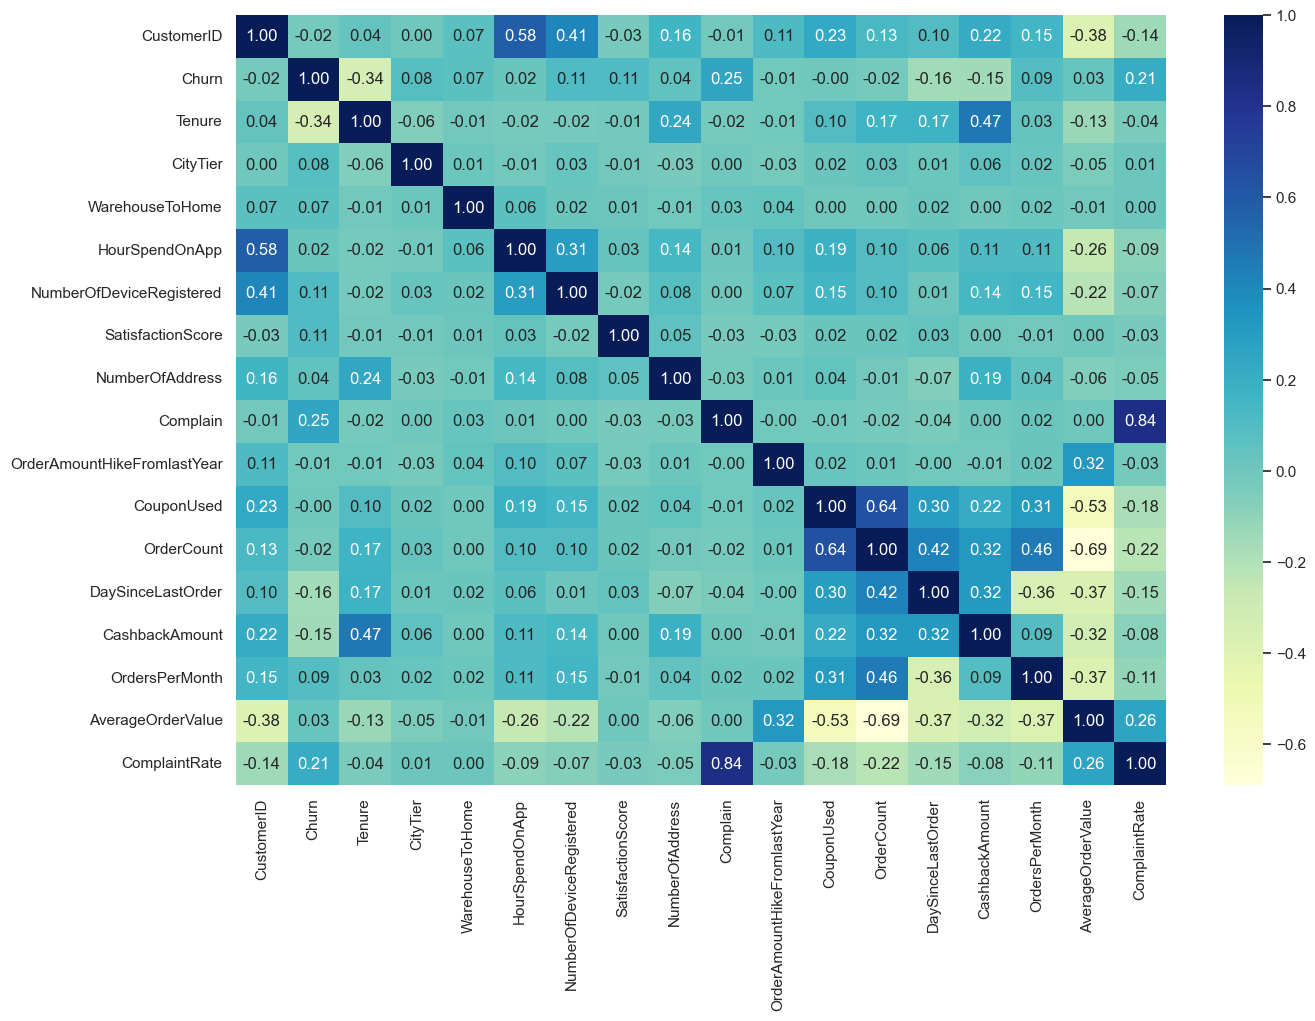

In [131]:
# choosing size
sns.set(rc={'figure.figsize':(15, 10)})
# heatmap plot
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt='.2f')

It can be seen that the correlation level of ComplaintRate with the Churn column is the highest (0.24) - still a weak, slight correlation, it's not very meaningful. 

The two columns OrdersPerMonth and AverageOrderValue are unrelated

### Ploting feature for digging insights 

### Tenure

In [132]:
import plotly.graph_objs as go
import plotly.offline as pyoff

# Group by tenure and calculate mean churn rate
df_plot = data.groupby('Tenure')['Churn'].mean().reset_index()

# Create plot data
plot_data = [
    go.Scatter(
        x=df_plot['Tenure'],
        y=df_plot['Churn'],
        mode='markers',
        name='Churn Rate',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
        ),
    )
]

# Define plot layout
plot_layout = go.Layout(
    title='Tenure-based Churn Rate',
    xaxis={'title': "Tenure"},
    yaxis={'title': "Churn Rate"},
    plot_bgcolor="rgb(243,243,243)",
    paper_bgcolor="rgb(243,243,243)"
)

# Create figure and plot
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Tenure cao hơn có nghĩa là Tỷ lệ Churn thấp hơn

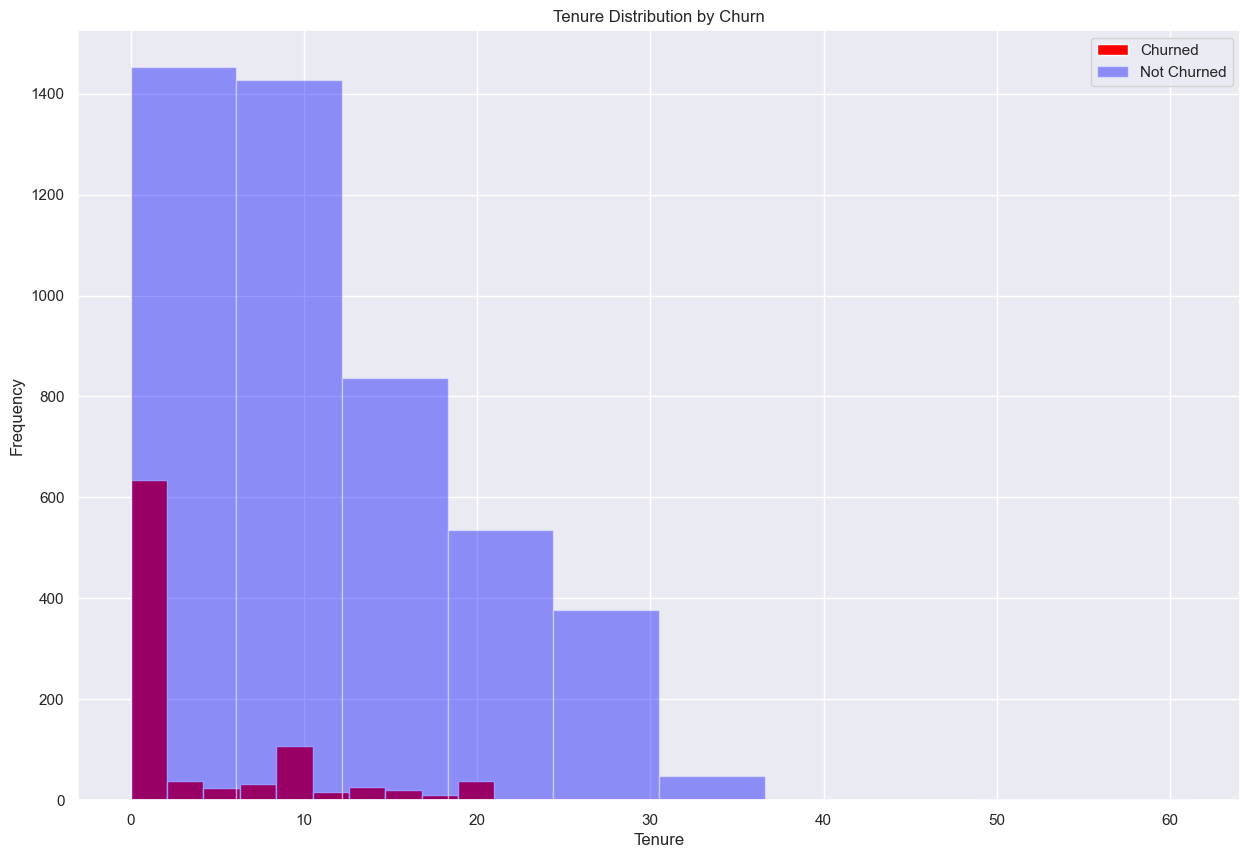

In [133]:
# Extract churned and non-churned data
churned = data[data["Churn"] == 1]["Tenure"]
not_churned = data[data["Churn"] == 0]["Tenure"]

# Create the histogram
plt.figure()
plt.hist(churned, label="Churned", color='red')
plt.hist(not_churned, label="Not Churned", color='blue', alpha=0.4)

# Add labels and title
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Tenure Distribution by Churn")

# Add legend
plt.legend()

# Show the plot
plt.show()

**Phân tích Histogram Tenure và Churn**:

Insight:

- **Churn tập trung ở khách hàng mới**: Mật độ churn cao ở tenure 0-10, cho thấy sản phẩm/dịch vụ chưa đáp ứng tốt nhu cầu khách hàng mới.

    
    -> Các khách hàng "churned" có thể chưa quá ấn tượng về công ty, trãi nghiệm chưa đủ thoả mãn, hoặc chính sách đổi trả bên công ty chưa linh hoạt, Khuyến mãi từ đối thủ cạnh tranh hấp dẫn hơn. Khách hàng mới đòi hỏi rất cao, họ cần nhiều hơn là những ưu đãi thông thường để có thể giữ chân họ ở lại. 
    
 
- **Nguy cơ mất khách hàng lâu năm**: Số lượng khách hàng tenure > 20 thấp, cần chiến lược giữ chân để duy trì doanh thu. 
    
    -> Các khách hàng "churned" thường yêu thích những chương trình tri ân, những sản phẩm/dịch vụ mới mẻ. 

Giải pháp:

- **Giữ chân khách hàng mới**: Cải thiện sản phẩm/dịch vụ, onboarding hiệu quả, chương trình ưu đãi dành cho khách hàng mới.
- Khuyến khích khách hàng lâu năm: Tri ân, chương trình VIP, ưu đãi đặc biệt theo tenure.
- **Phân tích chi tiết**: Chia nhỏ nhóm tenure, phân tích churn theo demographics, hành vi sử dụng, kênh thu hút khách hàng, nhóm sản phẩm/dịch vụ.

Kết luận:

Cần tập trung cải thiện trải nghiệm khách hàng ở mọi giai đoạn tenure để giảm churn và tăng doanh thu.

### HourSpendOnApp

In [134]:
unique_hourspendonapp = data['HourSpendOnApp'].unique()
print(unique_hourspendonapp)

[3. 2. 1. 0. 4. 5.]


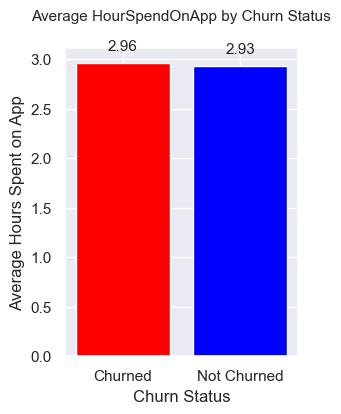

In [135]:
# Separate data by churn status
churned_data = data[data["Churn"] == 1]
not_churned_data = data[data["Churn"] == 0]

# Calculate means and colors
means = [churned_data["HourSpendOnApp"].mean(), not_churned_data["HourSpendOnApp"].mean()]


# Create the bar plot
plt.figure(figsize=(3, 4))
plt.bar(x=["Churned", "Not Churned"], height=means, color=['red', 'blue'])
plt.xlabel("Churn Status")
plt.ylabel("Average Hours Spent on App")
plt.title("Average HourSpendOnApp by Churn Status",fontsize=11,pad=20)

# Add values on top of bars
y_positions = [means[0] + 0.1, means[1] + 0.1]
for i, v in enumerate(means):
    plt.text(i, y_positions[i], f"{v:.2f}", ha='center', va='bottom', fontsize=11)

### WarehouseToHome

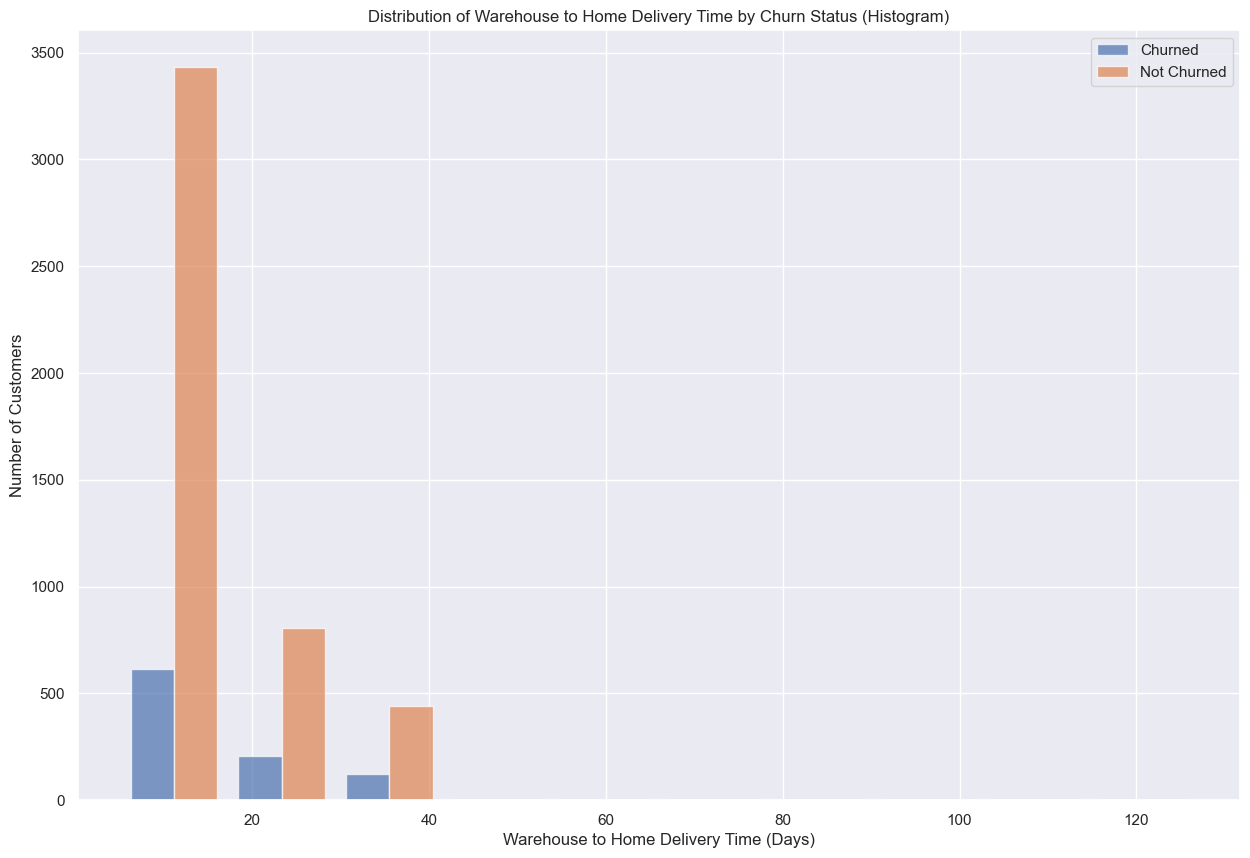

In [136]:
# Separate data by churn status
churned_data = data[data["Churn"] == 1]
not_churned_data = data[data["Churn"] == 0]

# Define labels for the bars
labels = ["Churned", "Not Churned"]

# Create the histogram
plt.figure()
plt.hist([churned_data["WarehouseToHome"], not_churned_data["WarehouseToHome"]], label=labels, alpha=0.7)
plt.xlabel("Warehouse to Home Delivery Time (Days)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Warehouse to Home Delivery Time by Churn Status (Histogram)")
plt.legend()
plt.show()

**Histogram về WarehouseToHome và Churn**
    
Insight:

- **Cải thiện thời gian giao hàng**: Giảm churn, tăng tỷ lệ giữ chân khách hàng.
- **Khách hàng "Churn"**: Nhạy cảm về thời gian, ít kiên nhẫn, hay so sánh giá cả, dịch vụ.

Công ty nên nâng cao trải nghiệm giao hàng để giảm churn, tăng tỷ lệ giữ chân khách hàng.

Đề xuất:

**Cải thiện thời gian giao hàng**:
- Hợp tác với công ty vận chuyển hiệu quả hơn.
- Tối ưu hóa quy trình kho bãi.
- Cung cấp các tùy chọn giao hàng linh hoạt.
- Minh bạch thông tin thời gian giao hàng.

**Tri ân khách hàng kiên nhẫn**:
- Cung cấp ưu đãi, giảm giá.
- Gửi lời xin lỗi chân thành.

### ComplaintRate

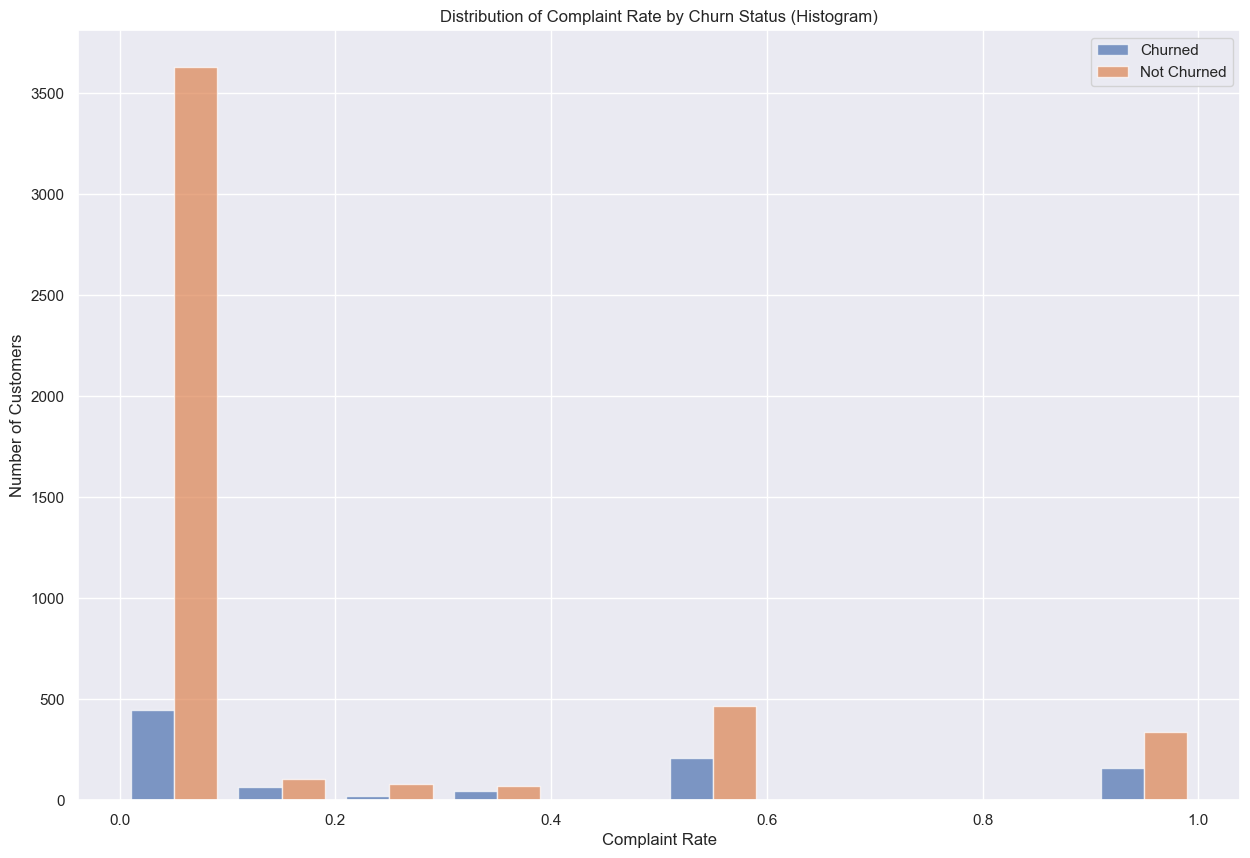

In [137]:
# Separate data by churn status
churned_data = data[data["Churn"] == 1]
not_churned_data = data[data["Churn"] == 0]

# Define labels for the bars
labels = ["Churned", "Not Churned"]

# Create the histogram
plt.figure()
plt.hist([churned_data["ComplaintRate"], not_churned_data["ComplaintRate"]], label=labels, alpha=0.7)
plt.xlabel("Complaint Rate")
plt.ylabel("Number of Customers")
plt.title("Distribution of Complaint Rate by Churn Status (Histogram)")
plt.legend()
plt.show()

**Phân tích Histogram Tỷ Lệ Khiếu Nại (Complaint Rate)**

Theo biểu đồ thì :

- Tỷ lệ khiếu nại của người dùng không hủy dịch vụ (not churn) cao hơn so với người dùng hủy dịch vụ (churn).
- Biểu đồ tập trung nhiều ở mức 0.0 (không khiếu nại) và tăng nhẹ ở mức 0.6 và 1.0.

**Insight**:

- **Not churn:**
    - **Họ sử dụng ứng dụng nhiều hơn:** Do đó, họ có nhiều khả năng gặp sự cố và khiếu nại.
    - **Họ có kỳ vọng cao hơn:** Do họ đã đầu tư thời gian và tiền bạc vào ứng dụng.
    - **Họ có thể sẵn sàng chia sẻ phản hồi hơn:** Do họ tin rằng phản hồi của họ sẽ được lắng nghe và giải quyết.
- **Churn:**
    - Có thể có lý do khác dẫn đến churn (thiếu tính năng, giá cả, trải nghiệm người dùng).
    - **Tuy nhiên, tỷ lệ khiếu nại cao có thể là dấu hiệu cho thấy sự không hài lòng của người dùng:**
        - Điều này có thể dẫn đến việc hủy dịch vụ trong tương lai.
    
    → thường thì nếu đã có ý định không dùng ứng dụng nữa họ sẽ ít complaint và rời đi, nếu không spot được và chăm sóc họ không chu đáo thì tỷ lệ churn của họ sẽ tăng cao.
    

**Lời khuyên:**

- **Phân tích chi tiết các khiếu nại:**
    - Xác định các vấn đề phổ biến nhất khiến người dùng không hài lòng.
    - Ưu tiên giải quyết những vấn đề này để cải thiện trải nghiệm người dùng.
- **Theo dõi tỷ lệ khiếu nại theo thời gian:**
    - Đánh giá hiệu quả của các nỗ lực cải thiện của bạn.
    - Xác định các lĩnh vực cần cải thiện thêm.

### SatisfactionScore

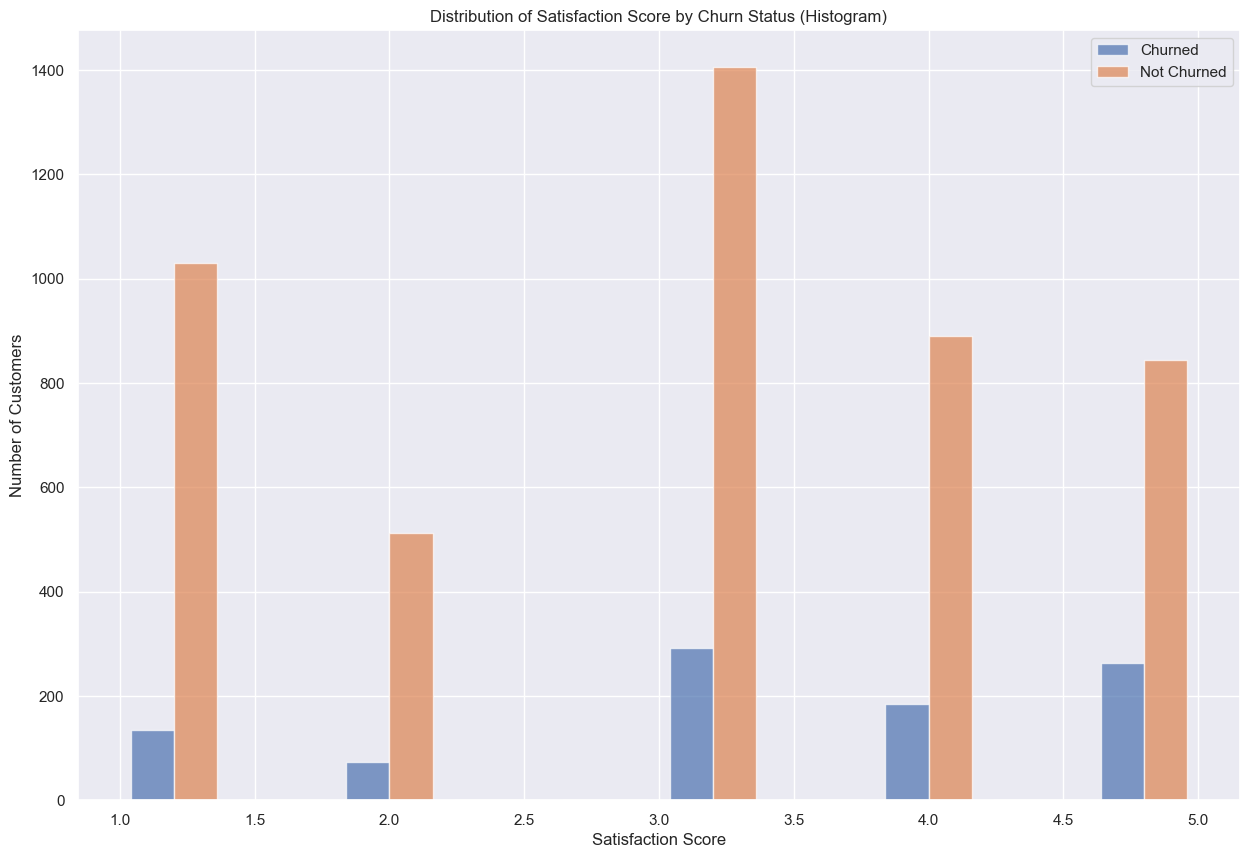

In [138]:
# Separate data by churn status
churned_data = data[data["Churn"] == 1]
not_churned_data = data[data["Churn"] == 0]

# Define labels for the bars
labels = ["Churned", "Not Churned"]

# Create the histogram
plt.figure()
plt.hist([churned_data["SatisfactionScore"], not_churned_data["SatisfactionScore"]], label=labels, alpha=0.7)
plt.xlabel("Satisfaction Score")
plt.ylabel("Number of Customers")
plt.title("Distribution of Satisfaction Score by Churn Status (Histogram)")

plt.legend()
plt.show()

Phân tích Insight từ Histogram về Satisfaction Score và Churn Patterns:

**Nhóm khách hàng**:

- SS thấp (1.0 & 2.0): Người dùng mới hoặc chưa trải nghiệm đầy đủ giá trị sản phẩm/dịch vụ.
- SS trung bình (3.0 & 4.0): Nguy cơ churn cao, cần tập trung giữ chân.
- SS cao (5.0): Tỷ lệ churn cao bất ngờ, cần phân tích chi tiết nguyên nhân.

**Khuyến nghị**:

- Cải thiện trải nghiệm onboarding: Hướng dẫn sử dụng chi tiết, đơn giản, hỗ trợ trực tiếp, chương trình khuyến mãi chào mừng.
- Cá nhân hóa trải nghiệm: Gợi ý sản phẩm phù hợp, ưu đãi theo sở thích, nhu cầu.
- Tri ân khách hàng: Chương trình tích điểm đổi quà, ưu đãi theo cấp độ, quà tặng vào dịp đặc biệt.
- Tăng cường tương tác: Gửi thông tin cập nhật, tổ chức hoạt động cộng đồng, minigame.
- Cải thiện sản phẩm/dịch vụ: Nâng cấp tính năng, bổ sung sản phẩm đáp ứng nhu cầu khách hàng, giải quyết vấn đề khiến khách hàng không hài lòng.


**Kết luận**:

Cần tập trung cải thiện trải nghiệm và giữ chân nhóm khách hàng có SS trung bình và cao. 
Phân tích chi tiết SS theo demographics, hành vi sử dụng và kênh thu hút khách hàng để đưa ra chiến lược giữ chân hiệu quả.

### 6. Features Transformation 

### Select Feature  

Sau khi EDA thì các trường được giữ lại để tiến hành build machine learning gồm: 
    
    - Tenure
    - WarehouseToHome
    - HourSpendOnApp
    - SatisfactionScore
    - ComplaintRate
    - Churn

In [217]:
df_model= data[['Tenure','WarehouseToHome','HourSpendOnApp', 'SatisfactionScore','ComplaintRate','Churn']]
df_model

,Tenure,WarehouseToHome,HourSpendOnApp,SatisfactionScore,ComplaintRate,Churn
0,4.0,6.0,3.0,2,1.0,1
1,9.0,8.0,3.0,3,1.0,1
2,9.0,30.0,2.0,3,1.0,1
3,0.0,15.0,2.0,5,0.0,1
4,0.0,12.0,3.0,5,0.0,1
...,...,...,...,...,...,...
5625,10.0,30.0,3.0,1,0.0,0
5626,13.0,13.0,3.0,5,0.0,0
5627,1.0,11.0,3.0,4,0.5,0
5628,23.0,9.0,4.0,4,0.0,0


### Encoding ( Categorical) 

In [214]:
# Print unique values and their counts
print(data['SatisfactionScore'].unique())
print(data['HourSpendOnApp'].unique())

[2 3 5 4 1]
[3. 2. 1. 0. 4. 5.]


In [218]:
list_columns = ["HourSpendOnApp",'SatisfactionScore']
df_model = pd.get_dummies(df_model, columns = list_columns)
df_model

,Tenure,WarehouseToHome,ComplaintRate,Churn,HourSpendOnApp_0.0,HourSpendOnApp_1.0,HourSpendOnApp_2.0,HourSpendOnApp_3.0,HourSpendOnApp_4.0,HourSpendOnApp_5.0,SatisfactionScore_1,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5
0,4.0,6.0,1.0,1,0,0,0,1,0,0,0,1,0,0,0
1,9.0,8.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0
2,9.0,30.0,1.0,1,0,0,1,0,0,0,0,0,1,0,0
3,0.0,15.0,0.0,1,0,0,1,0,0,0,0,0,0,0,1
4,0.0,12.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0
5626,13.0,13.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1
5627,1.0,11.0,0.5,0,0,0,0,1,0,0,0,0,0,1,0
5628,23.0,9.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0


### Normalization (Numeric)

In [223]:
list_columns = df_model.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_df = df_model[list_columns]
scaler = MinMaxScaler()
model=scaler.fit(filter_df)
scaled_data=model.transform(filter_df)

df_model = pd.DataFrame(scaled_data, columns = list_columns)

In [225]:
df_model

,Tenure,WarehouseToHome,ComplaintRate,Churn,HourSpendOnApp_0.0,HourSpendOnApp_1.0,HourSpendOnApp_2.0,HourSpendOnApp_3.0,HourSpendOnApp_4.0,HourSpendOnApp_5.0,SatisfactionScore_1,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5
0,0.065574,0.008197,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.147541,0.024590,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.147541,0.204918,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.081967,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.057377,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.163934,0.204918,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5626,0.213115,0.065574,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5627,0.016393,0.049180,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,0.377049,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Encoding and Normalize for DecisionTree và RandomForest

In [292]:
ML_data = data.copy()

In [293]:
#Encoding
list_columns = ["HourSpendOnApp",'SatisfactionScore','PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'MaritalStatus', 'PreferedOrderCat']
ML_data = pd.get_dummies(ML_data, columns = list_columns)
ML_data

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,50001,1,4.0,3,6.0,3,9,1,11.0,1.0,...,0,0,0,1,0,0,1,0,0,0
1,50002,1,9.0,1,8.0,4,7,1,15.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,50003,1,9.0,1,30.0,4,6,1,14.0,0.0,...,1,0,0,1,0,0,0,1,0,0
3,50004,1,0.0,3,15.0,4,8,0,23.0,0.0,...,1,0,0,1,0,0,1,0,0,0
4,50005,1,0.0,1,12.0,3,3,0,11.0,1.0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,2,6,0,18.0,1.0,...,1,0,1,0,0,0,1,0,0,0
5626,55627,0,13.0,1,13.0,5,6,0,16.0,1.0,...,1,0,1,0,1,0,0,0,0,0
5627,55628,0,1.0,1,11.0,2,3,1,21.0,1.0,...,1,0,1,0,0,0,1,0,0,0
5628,55629,0,23.0,3,9.0,5,4,0,15.0,2.0,...,1,0,1,0,0,0,1,0,0,0


In [296]:
from sklearn.preprocessing import MinMaxScaler

# Check for infinity values
if np.any(np.isinf(ML_data)):
    # Replace infinity values with NaN
    ML_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for very large values
max_value = np.max(ML_data)
if np.any(max_value > 1e10):
    # Replace very large values with NaN
    ML_data.replace(ML_data[ML_data > 1e10], np.nan, inplace=True)

# Drop rows with NaN values
ML_data.dropna(inplace=True)

# Get list of columns
list_columns = ML_data.columns.tolist()

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ML_data)
ML_data_scaled = pd.DataFrame(scaled_data, columns=list_columns)

# Print first few rows of scaled data
ML_data

/Users/doanthinh/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,50001,1,4.0,3,6.0,3,9,1,11.0,1.0,...,0,0,0,1,0,0,1,0,0,0
2,50003,1,9.0,1,30.0,4,6,1,14.0,0.0,...,1,0,0,1,0,0,0,1,0,0
3,50004,1,0.0,3,15.0,4,8,0,23.0,0.0,...,1,0,0,1,0,0,1,0,0,0
4,50005,1,0.0,1,12.0,3,3,0,11.0,1.0,...,1,0,0,1,0,0,0,1,0,0
5,50006,1,0.0,1,22.0,5,2,1,22.0,4.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,2,6,0,18.0,1.0,...,1,0,1,0,0,0,1,0,0,0
5626,55627,0,13.0,1,13.0,5,6,0,16.0,1.0,...,1,0,1,0,1,0,0,0,0,0
5627,55628,0,1.0,1,11.0,2,3,1,21.0,1.0,...,1,0,1,0,0,0,1,0,0,0
5628,55629,0,23.0,3,9.0,5,4,0,15.0,2.0,...,1,0,1,0,0,0,1,0,0,0


## 7. Apply models

### Sample check

In [226]:
# Tính số lượng churn và không churn trong tập dữ liệu
churn_counts = data["Churn"].value_counts()

# In ra số lượng churn và không churn
print("Số lượng churn (Churn = 1):", churn_counts[1])
print("Số lượng không churn (Churn = 0):", churn_counts[0])

Số lượng churn (Churn = 1): 948
Số lượng không churn (Churn = 0): 4682


### 7.2 Split data

In [228]:
from sklearn.model_selection import train_test_split
x=df_model.drop('Churn', axis = 1)
y=df_model[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### 7.3 Apply LogisticRegression model

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score

# Initialize logistic regression model
log_reg = LogisticRegression(random_state=0)

# Fit the logistic regression model on the training data
log_reg.fit(x_train, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(x_train)

# Predict on the testing data
y_test_pred = log_reg.predict(x_test)

# Calculate balanced accuracy for training and testing sets
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print accuracy and balanced accuracy for both training and testing sets
print("balanced_accuracy_train:", train_balanced_accuracy)
print("balanced_accuracy_test:", test_balanced_accuracy)

# Print classification report for testing set
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

balanced_accuracy_train: 0.5810801451540655
balanced_accuracy_test: 0.559699846899237

Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      1551
         1.0       0.61      0.14      0.22       307

    accuracy                           0.84      1858
   macro avg       0.73      0.56      0.57      1858
weighted avg       0.81      0.84      0.80      1858



/Users/doanthinh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Confustion matrix

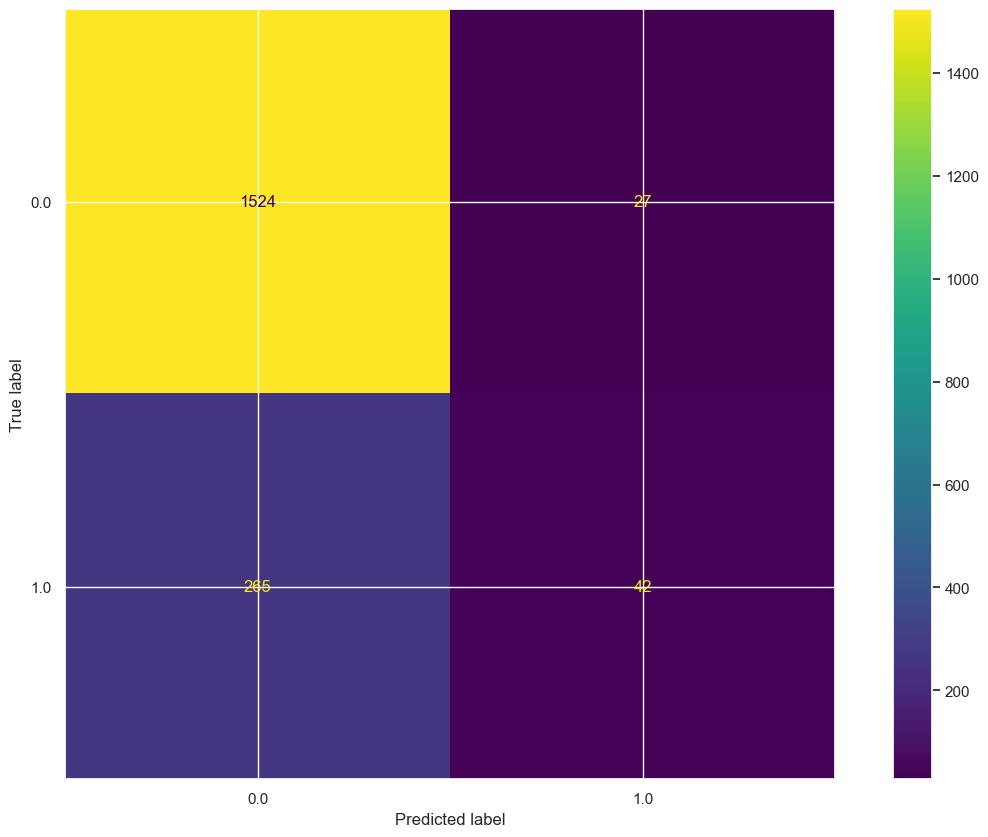

In [255]:
# Create confusion matrix for testing set
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

In [ ]:
TP: 1524 (Số lượng khách hàng hủy hợp đồng được dự đoán chính xác)
FP: 27 (Số lượng khách hàng tiềm năng được dự đoán sai thành sẽ hủy hợp đồng)
FN: 265 (Số lượng khách hàng hủy hợp đồng được dự đoán sai thành sẽ không hủy)
TN: 42 (Số lượng khách hàng tiềm năng được dự đoán chính xác)

In [342]:
# True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
TP_churn = cm[1][1]  # Top right corner
FP_churn = cm[0][1]  # Top middle
FN_churn = cm[1][0]  # Bottom left
TN_churn = cm[0][0]  # Bottom right

# Calculate metrics for Churn class
churn_sensitivity = TP_churn / (TP_churn + FN_churn)*100
churn_precision = TP_churn / (TP_churn + FP_churn)*100
churn_f1_score = 2 * churn_sensitivity * churn_precision / (churn_sensitivity + churn_precision)

# Repeat the same for Not Churn class
TP_not_churn = TN_churn  # Bottom right corner (same as TN)
FP_not_churn = FN_churn  # Bottom left (same as FN)
FN_not_churn = FP_churn  # Top middle (same as FP)
TN_not_churn = TP_churn  # Top right corner (same as TP)

# Calculate metrics for Not Churn class
not_churn_sensitivity = TP_not_churn / (TP_not_churn + FN_not_churn)*100
not_churn_precision = TP_not_churn / (TP_not_churn + FP_not_churn)*100
not_churn_f1_score = 2 * not_churn_sensitivity * not_churn_precision / (not_churn_sensitivity + not_churn_precision)

# Print the results
print("Churn Sensitivity: {:.2f}%".format(churn_sensitivity))
print("Churn Precision: {:.2f}%".format(churn_precision))
print("Churn F1-score: {:.2f}%".format(churn_f1_score))
print("Not Churn Sensitivity: {:.2f}%".format(not_churn_sensitivity))
print("Not Churn Precision: {:.2f}%".format(not_churn_precision))
print("Not Churn F1-score: {:.2f}%".format(not_churn_f1_score))

Churn Sensitivity: 13.68%
Churn Precision: 60.87%
Churn F1-score: 22.34%
Not Churn Sensitivity: 98.26%
Not Churn Precision: 85.19%
Not Churn F1-score: 91.26%


### Overfitting and Underfitting check 

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# Train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict probabilities on training and testing sets
train_probabilities = model.predict_proba(x_train)[:, 1]
test_probabilities = model.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC scores
train_auc = roc_auc_score(y_train, train_probabilities)
test_auc = roc_auc_score(y_test, test_probabilities)

print("Train AUC-ROC score:", train_auc)
print("Test AUC-ROC score:", test_auc)

Train AUC-ROC score: 0.8327322617018382
Test AUC-ROC score: 0.814236690839366


/Users/doanthinh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



- Hơi overfitting (do Test AUC-ROC score thấp hơn so với Train AUC-ROC score), nhưng sự chênh lệch không quá lớn, cho thấy mô hình vẫn có khả năng tổng quát hóa tốt trên dữ liệu mới.

In [283]:
# Assuming clf_logis is your logistic regression classifier, x_test is your test data, and y_test is your true labels

# Predict probabilities and labels
y_prob = clf_logis.predict_proba(x_test)[:, 1]
y_pred = clf_logis.predict(x_test)

# Create a DataFrame to store probabilities, predicted labels, and true labels
df = pd.DataFrame()
df['prob'] = y_prob
df['predicted_label'] = y_pred

# Ensure y_test is properly aligned with the DataFrame's index
df['true_label'] = y_test.reset_index(drop=True)  # Resetting index to ensure alignment

df

,prob,predicted_label,true_label
0,0.321095,0.0,1.0
1,0.120861,0.0,0.0
2,0.212360,0.0,0.0
3,0.211783,0.0,0.0
4,0.036800,0.0,0.0
...,...,...,...
1853,0.274827,0.0,0.0
1854,0.314409,0.0,0.0
1855,0.035807,0.0,0.0
1856,0.197656,0.0,1.0


### Split data for DecisionTree and RandomForest 

In [297]:
from sklearn.model_selection import train_test_split
X= ML_data.drop('Churn', axis = 1)
Y= ML_data[['Churn']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### 7.4 Apply DecisionTree

In [330]:
from sklearn.metrics import balanced_accuracy_score

# Fit model into train set:
clf_des = tree.DecisionTreeClassifier()
clf_des.fit(X_train,Y_train)

# Apply model on train set and test set: 
Y_tree_pre_train = clf_des.predict(X_train)
Y_tree_pre_test = clf_des.predict(X_test)

# Calculate the balanced accuracy on train set and test set to check overfiting and underfiting: 
print(f'Balance accuracy of train set: {balanced_accuracy_score(Y_train, Y_tree_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(Y_test, Y_tree_pre_test)}')

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.8700571895424837


**The current model performance suggests a risk of overfitting**

### Confustion Matrix 

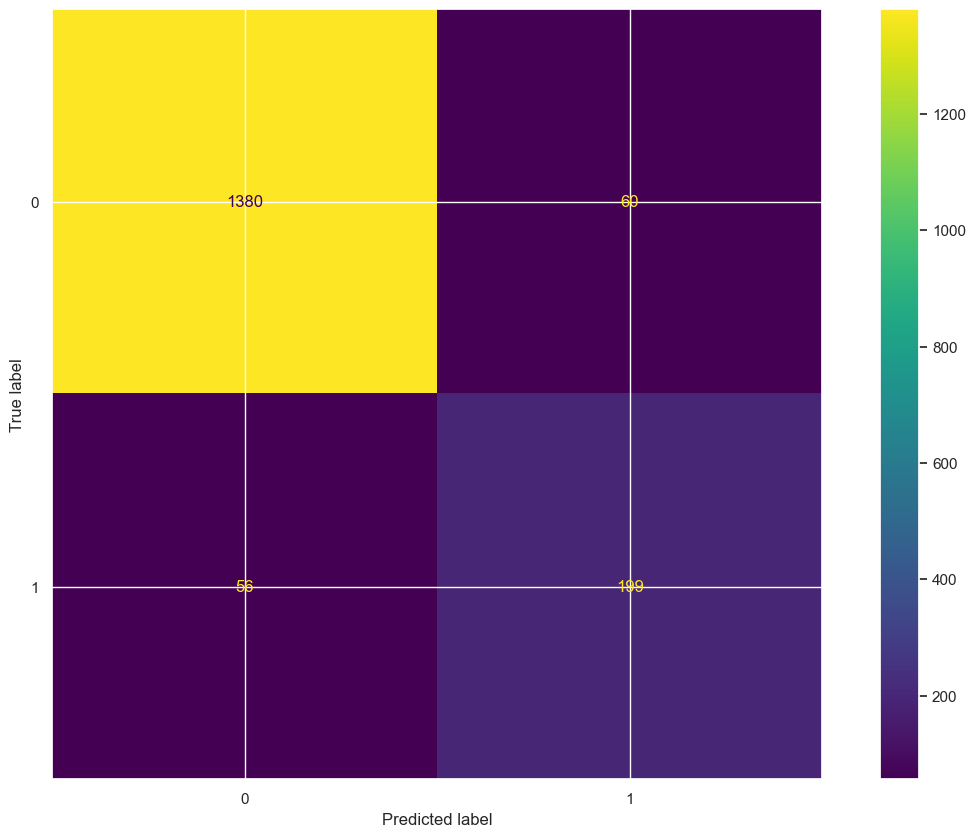

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Train a decision tree classifier
Y_train_array = Y_train.values.ravel()  # Convert Y_train to a NumPy array and flatten
clf_dt.fit(X_train, Y_train_array)

# Make predictions on the test set
Y_pred_dt = clf_dt.predict(X_test)

# Calculate confusion matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt, labels=clf_dt.classes_)

# Create and display ConfusionMatrixDisplay
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=clf_dt.classes_)
disp_dt.plot()

In [ ]:
TP: 1380 (Số lượng khách hàng hủy hợp đồng được dự đoán chính xác)
FP: 60 (Số lượng khách hàng tiềm năng được dự đoán sai thành sẽ hủy hợp đồng)
FN: 256 (Số lượng khách hàng hủy hợp đồng được dự đoán sai thành sẽ không hủy)
TN: 199 (Số lượng khách hàng tiềm năng được dự đoán chính xác)

In [343]:
# True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
TP_churn = cm_dt[1][1]  # Top right corner
FP_churn = cm_dt[0][1]  # Top middle
FN_churn = cm_dt[1][0]  # Bottom left
TN_churn = cm_dt[0][0]  # Bottom right

# Calculate metrics for Churn class
churn_sensitivity = TP_churn / (TP_churn + FN_churn)*100
churn_precision = TP_churn / (TP_churn + FP_churn)*100
churn_f1_score = 2 * churn_sensitivity * churn_precision / (churn_sensitivity + churn_precision)

# Repeat the same for Not Churn class
TP_not_churn = TN_churn  # Bottom right corner (same as TN)
FP_not_churn = FN_churn  # Bottom left (same as FN)
FN_not_churn = FP_churn  # Top middle (same as FP)
TN_not_churn = TP_churn  # Top right corner (same as TP)

# Calculate metrics for Not Churn class
not_churn_sensitivity = TP_not_churn / (TP_not_churn + FN_not_churn)*100
not_churn_precision = TP_not_churn / (TP_not_churn + FP_not_churn)*100
not_churn_f1_score = 2 * not_churn_sensitivity * not_churn_precision / (not_churn_sensitivity + not_churn_precision)

# Print the results
print("Churn Sensitivity: {:.2f}%".format(churn_sensitivity))
print("Churn Precision: {:.2f}%".format(churn_precision))
print("Churn F1-score: {:.2f}%".format(churn_f1_score))
print("Not Churn Sensitivity: {:.2f}%".format(not_churn_sensitivity))
print("Not Churn Precision: {:.2f}%".format(not_churn_precision))
print("Not Churn F1-score: {:.2f}%".format(not_churn_f1_score))

Churn Sensitivity: 78.04%
Churn Precision: 76.83%
Churn F1-score: 77.43%
Not Churn Sensitivity: 95.83%
Not Churn Precision: 96.10%
Not Churn F1-score: 95.97%


### Overfitting and Underfitting check 

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Predict probabilities on training and testing sets
train_probabilities = model.predict_proba(X_train)[:, 1]
test_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC scores
train_auc = roc_auc_score(Y_train, train_probabilities)
test_auc = roc_auc_score(Y_test, test_probabilities)

print("Train AUC-ROC score:", train_auc)
print("Test AUC-ROC score:", test_auc)

Train AUC-ROC score: 1.0
Test AUC-ROC score: 0.8597834967320261


**The current model performance suggests a risk of overfitting**

In [313]:
# Assuming clf_des is your decision tree classifier, X_test is your test data, and y_test is your true labels

# Predict probabilities and labels
Y_prob = clf_des.predict_proba(X_test)[:, 1]
Y_pred = clf_des.predict(X_test)

# Create a DataFrame to store probabilities, predicted labels, and true labels
df_des = pd.DataFrame()
df_des['prob'] = Y_prob
df_des['predicted_label'] = Y_pred

# Ensure y_test is properly aligned with the DataFrame's index
df_des['true_label'] = y_test.reset_index(drop=True)  # Resetting index to ensure alignment
df_des

,prob,predicted_label,true_label
0,1.0,1,1.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
1690,0.0,0,0.0
1691,0.0,0,1.0
1692,0.0,0,0.0
1693,0.0,0,0.0


### 7.5 Apply RandomForrest

In [335]:
from sklearn.ensemble import RandomForestClassifier

# Fit model into train set:
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)
clf_rand.fit(X_train, Y_train)

# Apply model on train set and test set: 
y_ranf_pre_train = clf_rand.predict(X_train)
y_ranf_pre_test = clf_rand.predict(X_test)

# Calculate the balanced accuracy on train set and test set to check overfiting and underfiting: 
print(f'Balance accuracy of train set: {balanced_accuracy_score(Y_train, Y_ranf_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(Y_test, Y_ranf_pre_test)}')

Balance accuracy of train set: 0.5
Balance accuracy of test set: 0.5


/Users/doanthinh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



- a balanced accuracy of 0.5 on both train and test sets is indicative of a severely underperforming model. 
- It suggests that the model is not learning anything useful from the data and is essentially making random predictions.

### Confustion Matrix 

/Users/doanthinh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



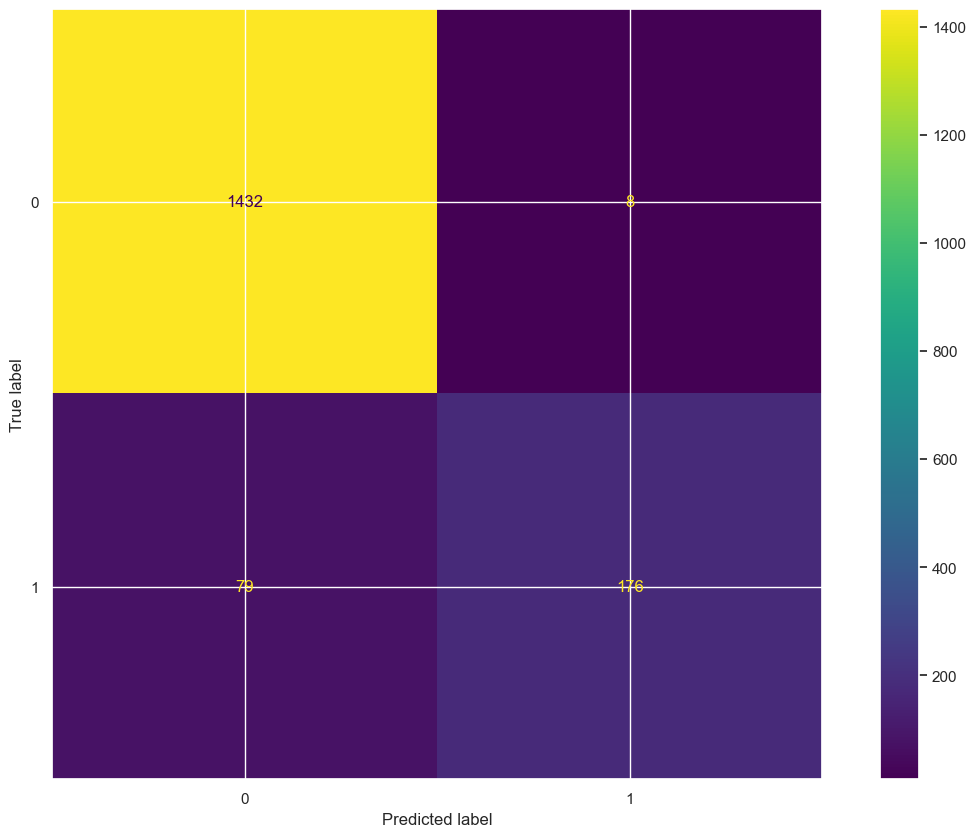

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Train a Random Forest classifier
clf_rf = RandomForestClassifier()  # Initialize the Random Forest classifier
clf_rf.fit(X_train, Y_train)  # Train the classifier

# Make predictions on the test set
Y_pred_rf = clf_rf.predict(X_test)

# Calculate confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf, labels=clf_rf.classes_)

# Create and display ConfusionMatrixDisplay
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=clf_rf.classes_)
disp_rf.plot()

In [ ]:
TP: 1432 (Số lượng khách hàng hủy hợp đồng được dự đoán chính xác)
FP: 8 (Số lượng khách hàng tiềm năng được dự đoán sai thành sẽ hủy hợp đồng)
FN: 279 (Số lượng khách hàng hủy hợp đồng được dự đoán sai thành sẽ không hủy)
TN: 176 (Số lượng khách hàng tiềm năng được dự đoán chính xác)

In [344]:
# True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
TP_churn = cm_rf[1][1]  # Top right corner
FP_churn = cm_rf[0][1]  # Top middle
FN_churn = cm_rf[1][0]  # Bottom left
TN_churn = cm_rf[0][0]  # Bottom right

# Calculate metrics for Churn class
churn_sensitivity = TP_churn / (TP_churn + FN_churn)*100
churn_precision = TP_churn / (TP_churn + FP_churn)*100
churn_f1_score = 2 * churn_sensitivity * churn_precision / (churn_sensitivity + churn_precision)

# Repeat the same for Not Churn class
TP_not_churn = TN_churn  # Bottom right corner (same as TN)
FP_not_churn = FN_churn  # Bottom left (same as FN)
FN_not_churn = FP_churn  # Top middle (same as FP)
TN_not_churn = TP_churn  # Top right corner (same as TP)

# Calculate metrics for Not Churn class
not_churn_sensitivity = TP_not_churn / (TP_not_churn + FN_not_churn)*100
not_churn_precision = TP_not_churn / (TP_not_churn + FP_not_churn)*100
not_churn_f1_score = 2 * not_churn_sensitivity * not_churn_precision / (not_churn_sensitivity + not_churn_precision)

# Print the results
print("Churn Sensitivity: {:.2f}%".format(churn_sensitivity))
print("Churn Precision: {:.2f}%".format(churn_precision))
print("Churn F1-score: {:.2f}%".format(churn_f1_score))
print("Not Churn Sensitivity: {:.2f}%".format(not_churn_sensitivity))
print("Not Churn Precision: {:.2f}%".format(not_churn_precision))
print("Not Churn F1-score: {:.2f}%".format(not_churn_f1_score))

Churn Sensitivity: 69.02%
Churn Precision: 95.65%
Churn F1-score: 80.18%
Not Churn Sensitivity: 99.44%
Not Churn Precision: 94.77%
Not Churn F1-score: 97.05%


### Overfitting and Underfitting check 

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict probabilities on training and testing sets
train_probabilities = model.predict_proba(X_train)[:, 1]
test_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC scores
train_auc = roc_auc_score(Y_train, train_probabilities)
test_auc = roc_auc_score(Y_test, test_probabilities)

print("Train AUC-ROC score:", train_auc)
print("Test AUC-ROC score:", test_auc)

/Users/doanthinh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train AUC-ROC score: 1.0
Test AUC-ROC score: 0.9785770697167756


In [346]:
# Assuming clf_rf is your random forest classifier

# Predict probabilities and labels
Y_prob_rf = clf_rf.predict_proba(X_test)[:, 1]
Y_pred_rf = clf_rf.predict(X_test)

# Create a DataFrame to store probabilities, predicted labels, and true labels
df_rf = pd.DataFrame()
df_rf['prob'] = Y_prob_rf
df_rf['predicted_label'] = Y_pred_rf

# Ensure y_test is properly aligned with the DataFrame's index
df_rf['true_label'] = y_test.reset_index(drop=True)  # Resetting index to ensure alignment
df_rf

,prob,predicted_label,true_label
0,0.71,1,1.0
1,0.03,0,0.0
2,0.30,0,0.0
3,0.05,0,0.0
4,0.01,0,0.0
...,...,...,...
1690,0.03,0,0.0
1691,0.06,0,1.0
1692,0.02,0,0.0
1693,0.04,0,0.0


### Show the feature important

In [308]:
feats = {}  # a dictionary to hold feature_name: feature_importance

for feature, importance in zip(X_train.columns, clf_rand.feature_importances_):
    feats[feature] = importance  # add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)
importances = importances.reset_index()

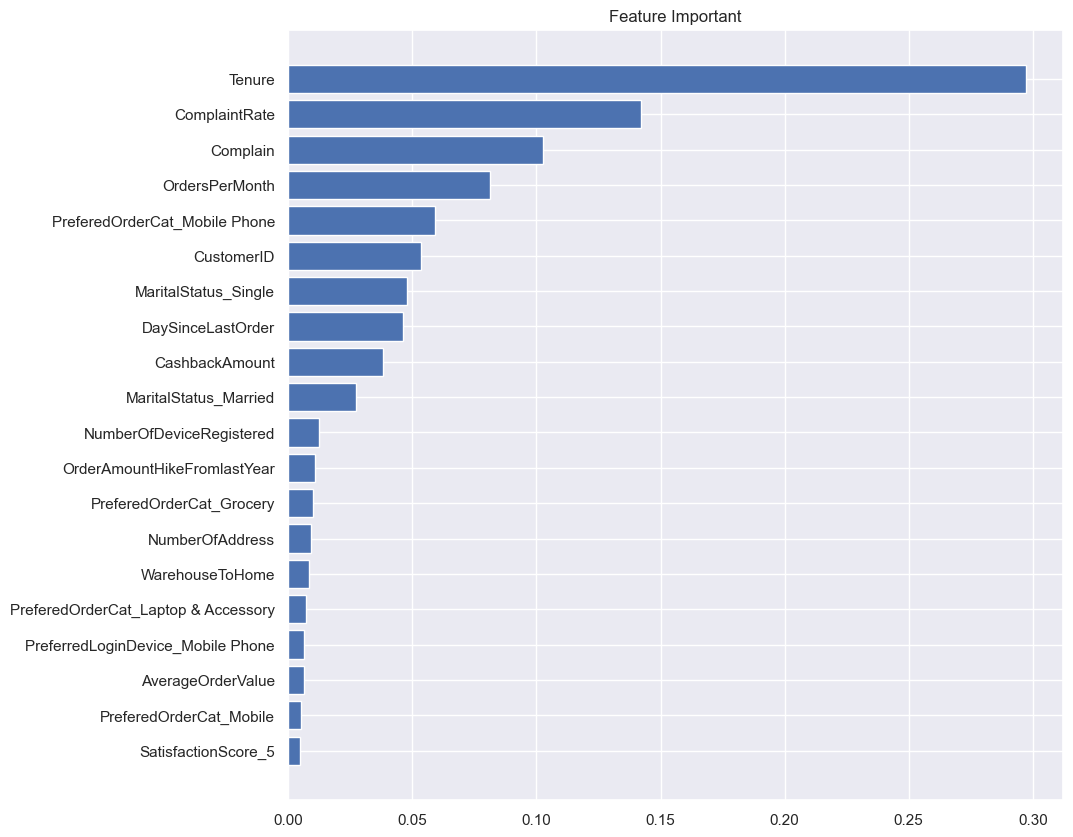

In [309]:
# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

### 7.5 Hyperparameter Tunning

 ## Có thể thấy RandomForest là model tốt nhất để process tiếp

#### RandomForest

In [348]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
clf_rand = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Convert pandas DataFrames to numpy arrays and reshape
x_train_np = x_train.values
x_test_np = x_test.values
y_train_np = y_train.values.ravel()
y_test_np = y_test.values.ravel()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy', verbose=1)

# Fit the model
grid_search.fit(x_train_np, y_train_np)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test_np, y_test_np)
print("Test set accuracy: ", accuracy)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test set accuracy:  0.9009687836383208


### 7.6. Probability Threshold Selection: 

/Users/doanthinh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



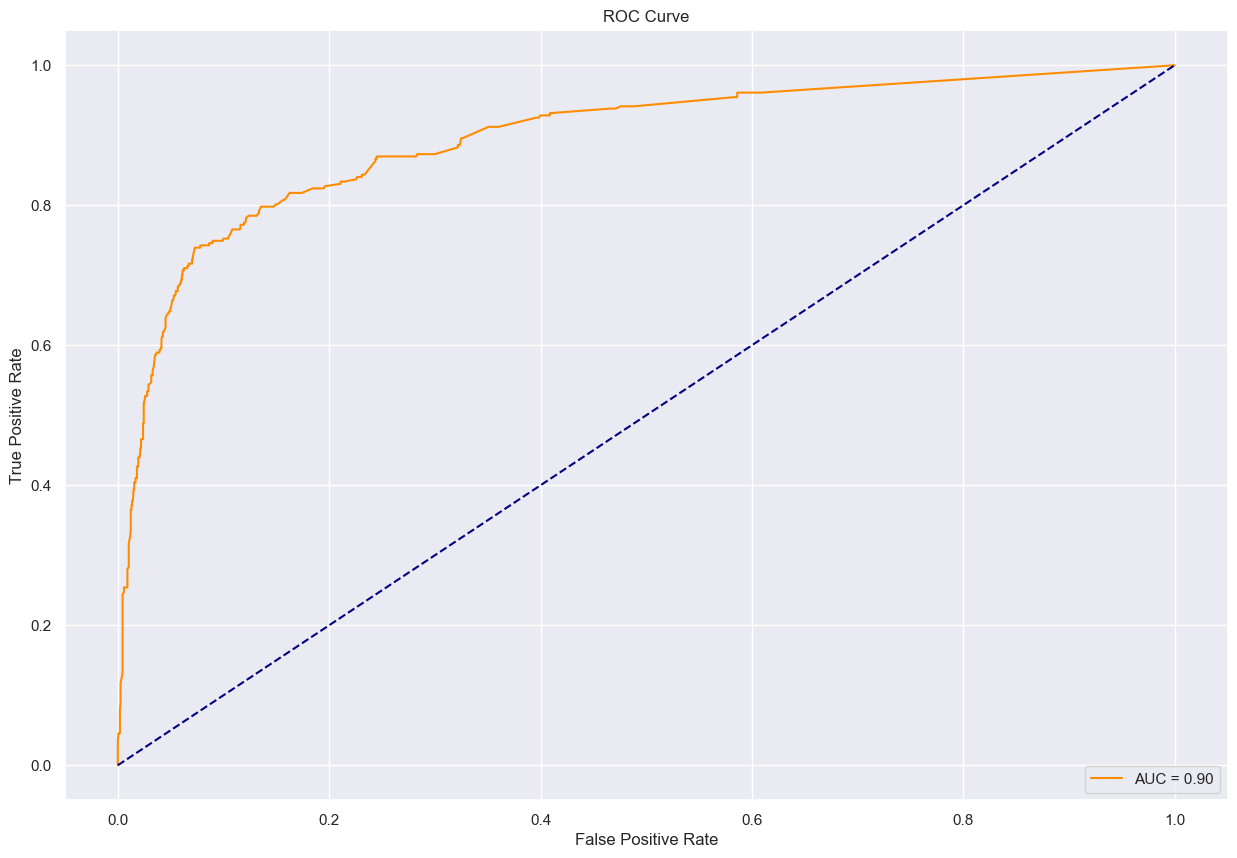

In [349]:
from sklearn.ensemble import RandomForestClassifier

# Assuming clf_rand is your RandomForestClassifier instance
clf_rand = RandomForestClassifier()

# Fit the classifier to the training data
clf_rand.fit(x_train, y_train)

# Now you can use the classifier to predict probabilities on the test set
y_rand_tun_proba = clf_rand.predict_proba(x_test)[:, 1]

# Now you can proceed with calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_rand_tun_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [352]:
# Calculate the distance for each threshold
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
# Get the threshold for the smallest distance
best_threshold = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_threshold}")

Best threshold: 0.18311111111111114


In [353]:
threshold = 0.18
y_pred_prod = (y_rand_tun_proba > threshold).astype(int)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_prod)
print("Test balanced accuracy:", round(balanced_accuracy, 5))

Test balanced accuracy: 0.83004
